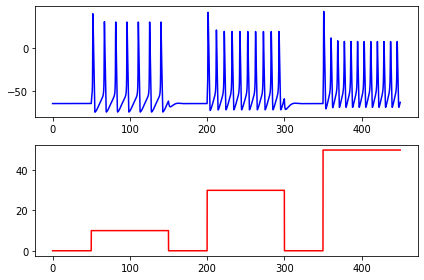

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
t=0.0 # t has ms scale.
dt=0.01 # t has ms scale.
endTime=450.0 # t has ms scale.
steps=endTime/dt
v = -64.9963793311746
#I_app = 10
#怪しい
V_Na = 50
V_K = -77
V_L = -54.387
g_Na = 120
g_K = 36.0
g_L = 0.3
C_m = 1.0 #uF/cm^2
m = 0.052955086813008014
n = 0.3177323997608804
h = 0.5959941207331235
t_array=np.arange(0,endTime,dt)
v_array=np.array([])
I_array=np.array([])
m_array=np.array([])
n_array=np.array([])
h_array=np.array([])
for step in range(int(steps)):
    
    if t < 50:
        I_app = 0
    elif 50 < t < 150:
        I_app = 10
    elif 150 < t < 200:
        I_app = 0
    elif 200 < t < 300:
        I_app = 30
    elif 300 < t < 350:
        I_app = 0
    else:
        I_app = 50
    t += dt #時間をすすめる
    a_m = 0.1*(v+40.0)/(1.0 - math.exp(-(v+40.0) / 10.0))
    b_m = 4.0*math.exp(-(v+65.0) / 18.0)
    a_h = 0.07*math.exp(-(v+65.0) / 20.0)
    b_h = 1.0/(1.0 + math.exp(-(v+35.0) / 10.0))
    a_n = 0.01*(v+55.0)/(1.0 - math.exp(-(v+55.0) / 10.0))
    b_n = 0.125*math.exp(-(v+65) / 80.0)
    
    I_Na = (m**3)*h*g_Na*(v-V_Na)
    I_K = (n**4)*g_K*(v-V_K)
    I_L = g_L*(v-V_L)
    
    dv_dt = (-I_L-I_K-I_Na+I_app)/C_m
    v += dv_dt * dt
    
    dm_dt = a_m*(1-m) - b_m*m
    m += dm_dt * dt
    
    dn_dt = a_n*(1-n) - b_n*n
    n += dn_dt * dt
    
    dh_dt = a_h*(1-h) - b_h*h
    h += dh_dt * dt
    
    v_array=np.append(v_array,v)
    I_array=np.append(I_array,I_app)
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.plot(t_array,v_array,c='b', label = 'V')
ax2.plot(t_array,I_array,c='r', label = 'I')
fig.tight_layout()              #レイアウトの設定
plt.show()